# <font color='red'>DETECTION OF FAKE WEBSITES WITH MACHINE LEARNING TECHNIQUES</font>

In this work, the Phishing Websites Dataset provided by Machine Learning Repository (UCI) was analyzed using classification methods.

<h1>
    <font color='maroon'>Table of Contents</font>
</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About Phishing Websites Dataset</a></li>
        <li><a href="#visualization">Data Visualization </a></li>
        <li><a href="#preprocessing">Data Preprocessing</a></li>
        <li><a href="#classification">Classification</a></li>
        <li><a href="#conclusion">Conclusion</a></li>
    </ol>
</div>
<br>
<hr>


First, basic Python libraries that will be used during the work are imported.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

 <div id="about_dataset">
    <h2>
        <font color='purple'>1. About Phishing Website Dataset</font>
    </h2>
</div>

Due to the lack of agreement in the literature on the precise features that characterize phishing web pages, very few detailed and comprehensive data sets have been published on this topic. In this study, it was decided to use the Phishing Websites dataset, as it contains important features that have proven to be robust and effective in predicting phishing websites.

The data set consists of 31 attributes and 11055 samples. It basically contains attributes consisting of 4 categories. These categories are 

    1. Address Bar Based Features, 
    2. Abnormal Based Features, 
    3. HTML and JavaScript Based Features, and 
    4. Domain Based Featuress. 

Let's take a closer look at these attributes.

**LOAD DATASET FROM CSV FILE**

The dataset must be loaded before its attributes can be determined.

In [2]:
phishingDataset = pd.read_csv('PhishingWebsites.csv')      #import dataset
phishingDataset.head(10)                                   #checking the first elements of the dataset.

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [6]:
phishingDataset.tail(5)                 #checking the last elements of the dataset.

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1
11054,-1,-1,1,1,1,-1,-1,-1,1,1,...,1,1,-1,1,-1,-1,-1,1,-1,-1


In [7]:
print("Shape of Phishing Websites Dataset: ",phishingDataset.shape)

Shape of Phishing Websites Dataset:  (11055, 31)


In the dataset, there are 31 attributes and 11055 samples

**INFORMATION OF ATTRIBUTES**

In [8]:
phishingDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

As seen in above, all of the attributes is in the type of int64. Let's rename the attribute names to make them more useful.

In [9]:
phishingDataset.rename(columns = {'having_IP_Address':'Having_IP_Address', 
                       'having_At_Symbol':'Having_at_Symbol',
                       'double_slash_redirecting':'Double_Slash_Redirecting',
                       'having_Sub_Domain':'Having_Subdomain',
                       'SSLfinal_State':'SSL_Final_State',
                       'Domain_registeration_length':'Domain_Registeration_Length',
                       'port':'Port',
                       'HTTPS_token':'HTTPS_Token',
                       'URL_of_Anchor':'URL_of_Anchor',
                       'Links_in_tags':'Links_in_Tags',
                       'Submitting_to_email':'Submitting_to_Email',
                       'on_mouseover':'On_Mouseover',
                       'RightClick':'Right_Click',
                       'popUpWidnow':'PopUp_Widnow',
                       'age_of_domain':'Age_of_Domain',
                       'DNSRecord':'DNS_Record',
                       'web_traffic':'Web_Traffic',
                       'Links_pointing_to_page':'Links_Pointing_to_Page',
                       'Statistical_report':'Statistical_Report'
                      }, inplace = True)

In [10]:
phishingDataset.columns    #after renaming

Index(['Having_IP_Address', 'URL_Length', 'Shortining_Service',
       'Having_at_Symbol', 'Double_Slash_Redirecting', 'Prefix_Suffix',
       'Having_Subdomain', 'SSL_Final_State', 'Domain_Registeration_Length',
       'Favicon', 'Port', 'HTTPS_Token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_Tags', 'SFH', 'Submitting_to_Email', 'Abnormal_URL',
       'Redirect', 'On_Mouseover', 'Right_Click', 'PopUp_Widnow', 'Iframe',
       'Age_of_Domain', 'DNS_Record', 'Web_Traffic', 'Page_Rank',
       'Google_Index', 'Links_Pointing_to_Page', 'Statistical_Report',
       'Result'],
      dtype='object')

**ATTRIBUTE EXPLANATION**

**SUMMARY OF STATISTICS PERTAINING TO ATTRIBUTES**

In [11]:
phishingDataset.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
Having_at_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
Double_Slash_Redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
Having_Subdomain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSL_Final_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_Registeration_Length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


<div id="visualization">
    <h2>
        <font color='purple'>2. Data Visualization</font>
    </h2>
</div>

In this section, target variable and all other attributes will be examined by using graphs before data preprocessing step.

**FOR OUTPUT VARIABLE**

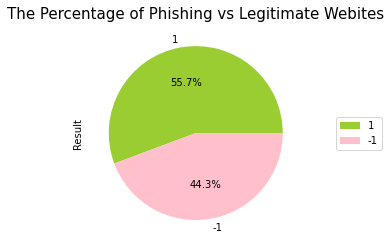

In [12]:
phishingDataset['Result'].value_counts().plot(kind='pie',colors =['yellowgreen','pink'], autopct='%1.1f%%')
plt.legend(loc=10, bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('The Percentage of Phishing vs Legitimate Webites', size = 15);
plt.show()

Looking at the graph above, it is observed that the class distribution in the data set is almost half.

**FOR ALL ATTRIBUTES**

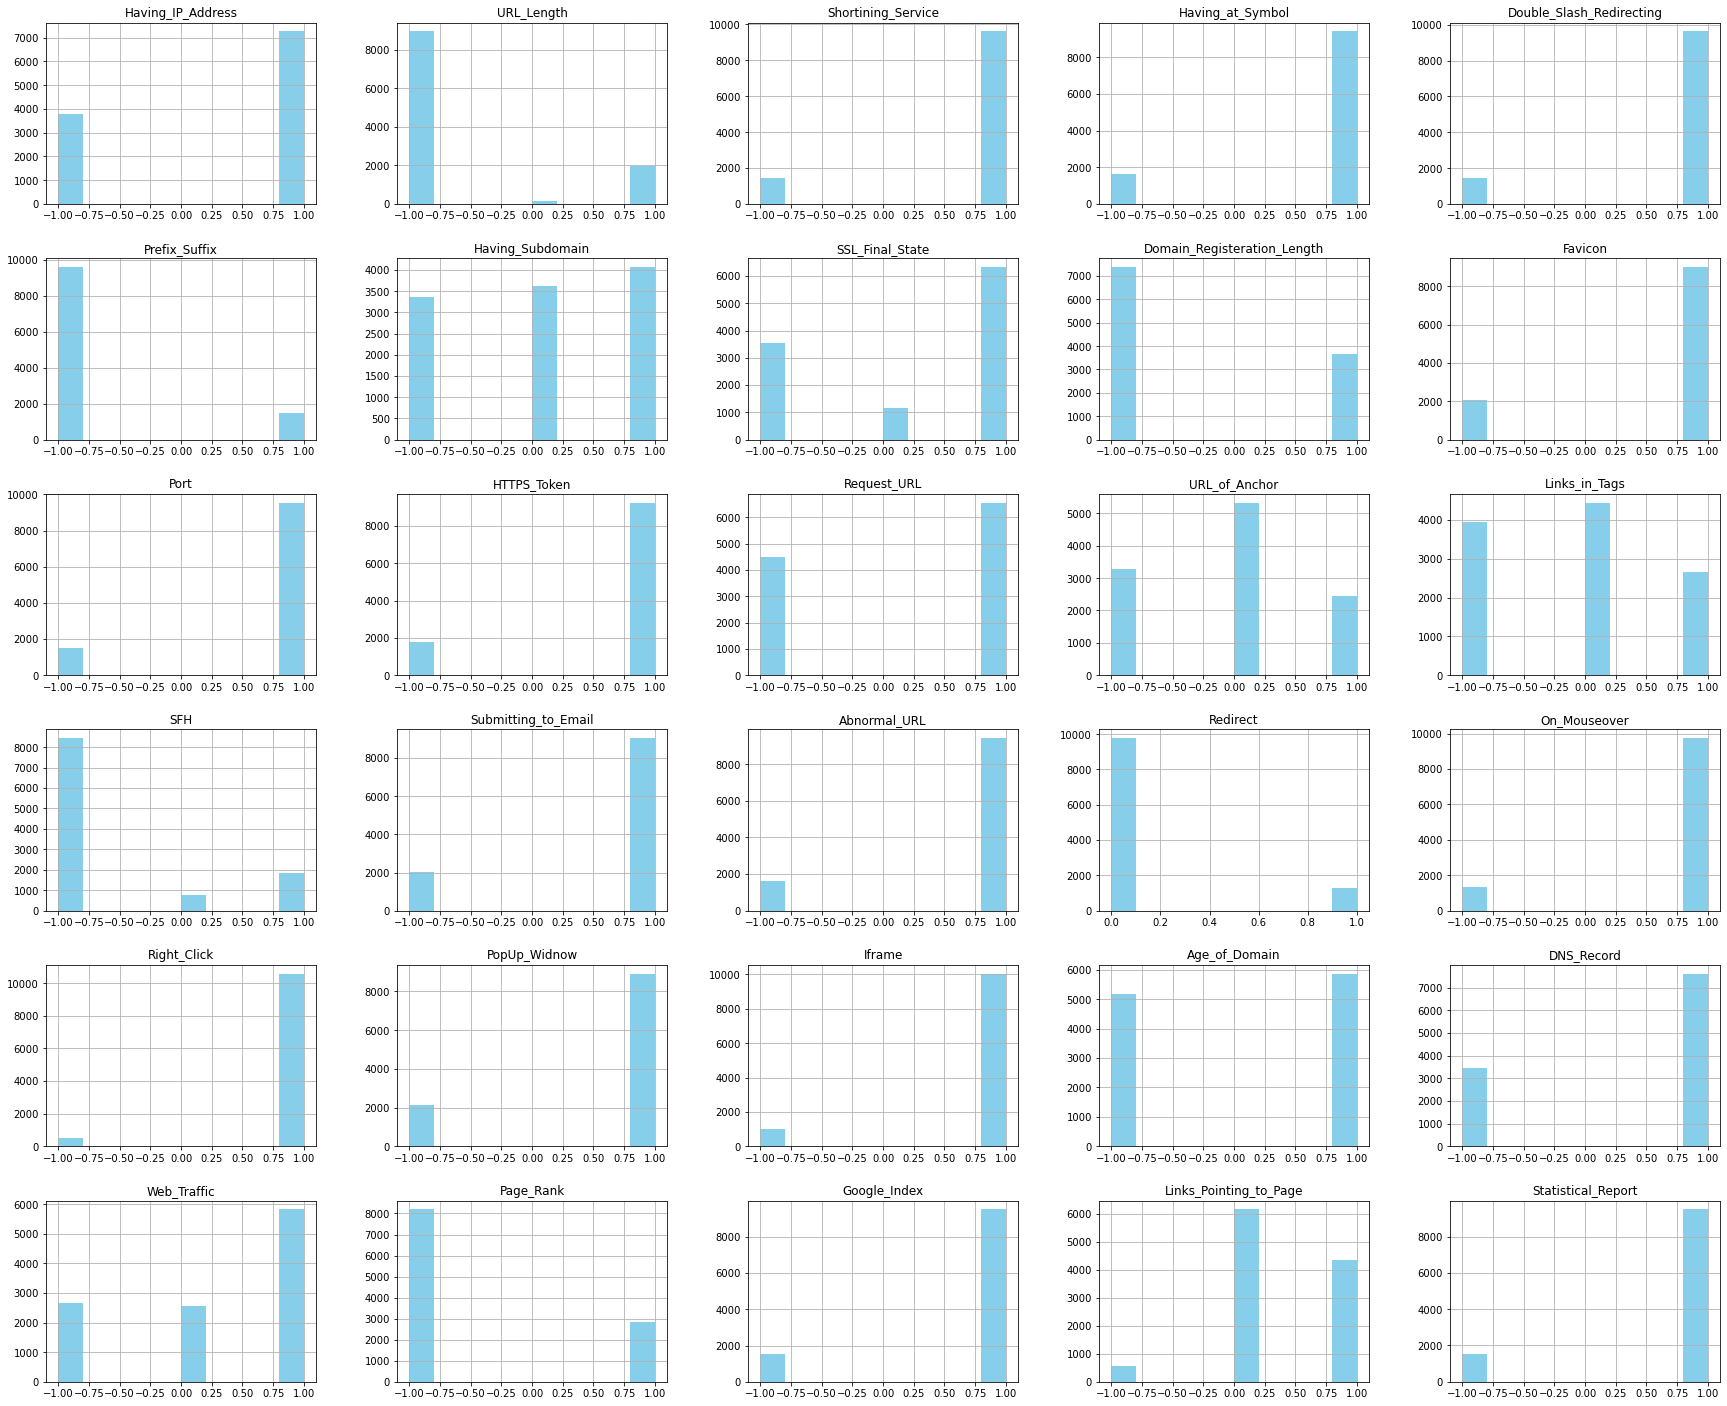

In [13]:
dataset = phishingDataset.drop('Result', 1)    #all ayytibutes except target attribute
dataset.hist(color = "skyblue",linewidth = 1.2,figsize = (30,25))
plt.show()

<div id="preprocessing">
    <h2>
        <font color='purple'>3. Data Preprocessing</font>
    </h2>
</div>

Before performing machine learning operations on the dataset, the dataset must undergo a preprocessing process for these operations. The first step of this preprocessing step is to clean dataset.

<font color='burgundy'>**A. DATA CLEANING**</font>

Real-world data tend to be incomplete, noisy, and inconsistent. Data cleaning (or data cleansing) routines attempt to fill in missing values, smooth out noise while identifying outliers, and correct inconsistencies in the data. Missing Data Analysis and Outlier Analysis, which are data cleaning methods, will be applied to this data set.

**1. Missing Data Analysis**

Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest. The problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data 

In [14]:
nullValues = pd.DataFrame(data=phishingDataset.isnull().sum().sort_values(), columns = ["Number of Null Values"]).reset_index()
nullValues.columns = ["Features", "Number of Null Values"]
nullValues.pivot_table(index=nullValues.Features, aggfunc='sum', margins=True, margins_name='Total')

,Number of Null Values
Features,
Abnormal_URL,0
Age_of_Domain,0
DNS_Record,0
Domain_Registeration_Length,0
Double_Slash_Redirecting,0
Favicon,0
Google_Index,0
HTTPS_Token,0
Having_IP_Address,0


As can be seen as a result of the examinations on the data set, there is no missing value in the data set. Therefore, no action will be taken regarding the lost value.

**2. Outlier Analysis**

Outlier analysis is the process of identifying outliers, or abnormal observations, in a dataset. Also known as outlier detection, it's an important step in data analysis, as it removes erroneous or inaccurate observations which might otherwise skew conclusions. One of the data preparation stages is the detection and resolution of these outliers in the data set. 

Let's use the box plot, one of the graphical methods, to quickly see which variables have outliers before an inferential outlier enters the analysis in the data set.

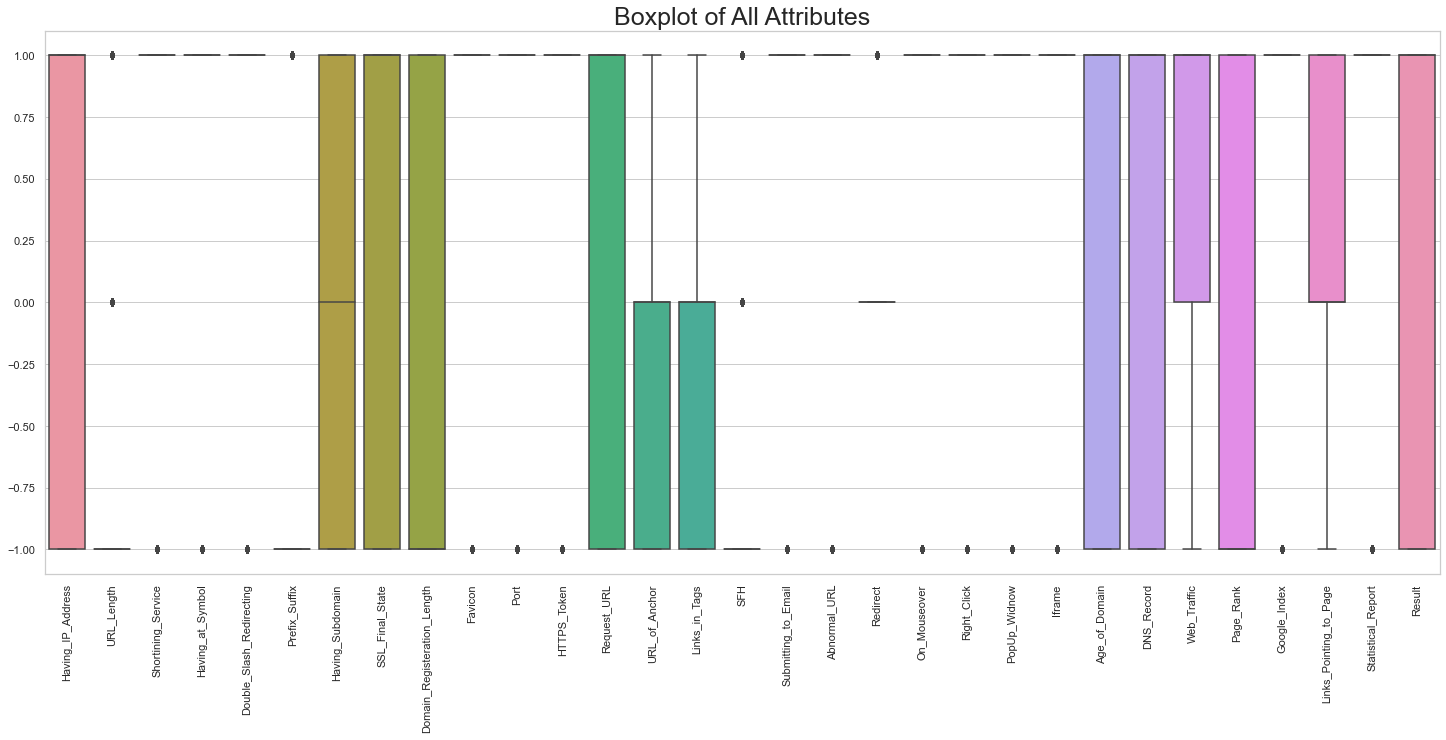

In [15]:
plt.rcParams["figure.figsize"] = (25,10)
sns.set_theme(style="whitegrid")

stud_bplt = sns.boxplot(data = phishingDataset)

stud_bplt.plot()
plt.xticks(rotation=90)
plt.title("Boxplot of All Attributes", size=25)
plt.show()

As can be seen in the figure above, point outliers were found in 18 features.

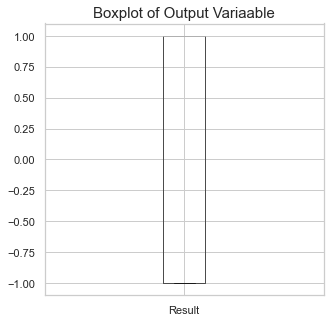

In [16]:
plt.rcParams["figure.figsize"] = (5,5)
stud_bplt = phishingDataset.boxplot(column = ['Result'])
stud_bplt.plot()
plt.title("Boxplot of Output Variaable",size=15)
plt.show()


No outlier was found in the target attribute in the data set.

In order to understand whether point outliers that were found in the 18 attributes are significant, the histogram and kernel density estimate(kde) plots of all features are examined below separately.

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


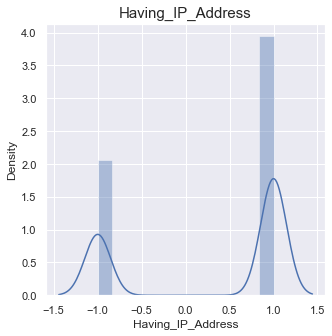

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


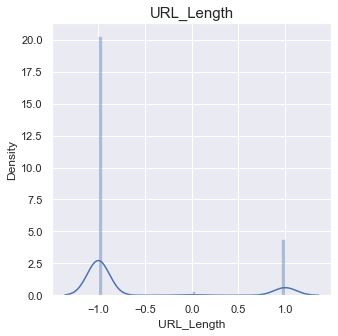

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


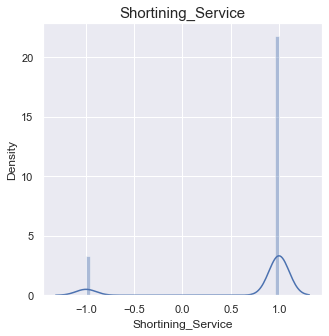

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


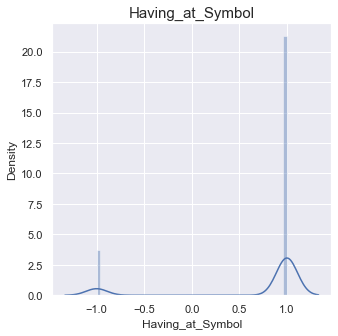

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


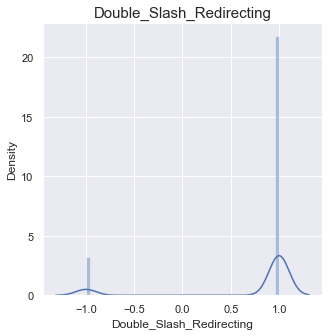

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


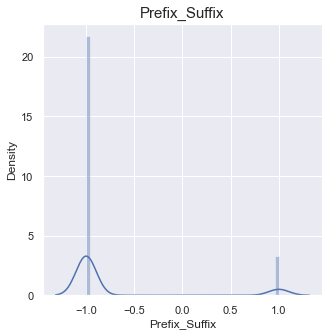

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


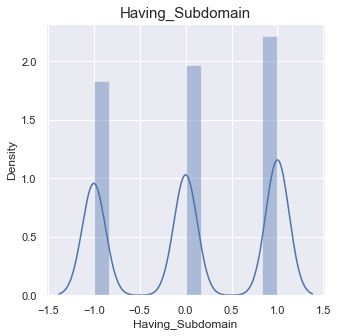

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


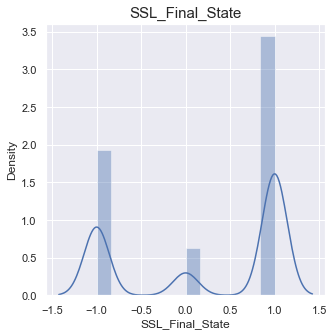

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


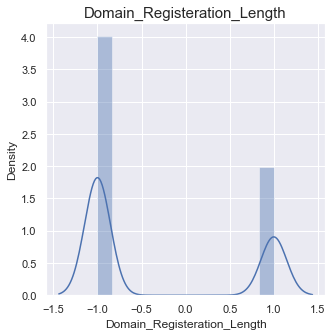

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


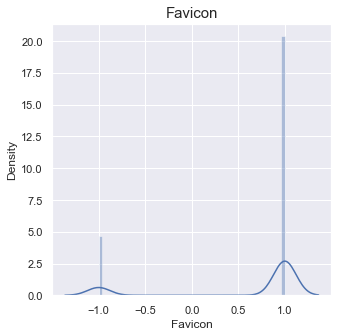

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


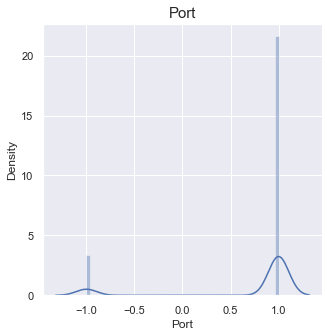

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


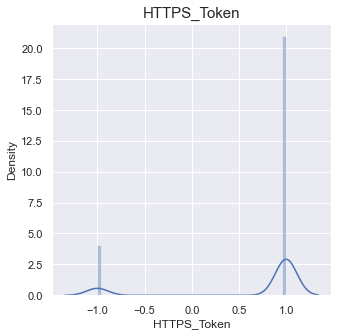

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


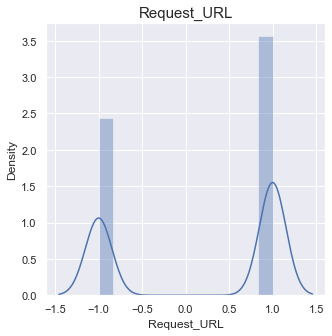

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


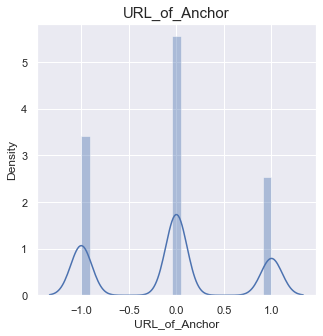

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


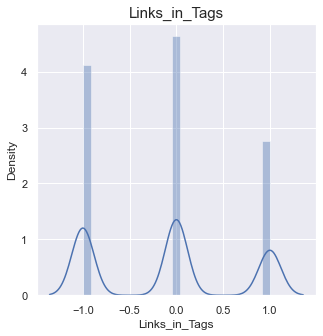

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


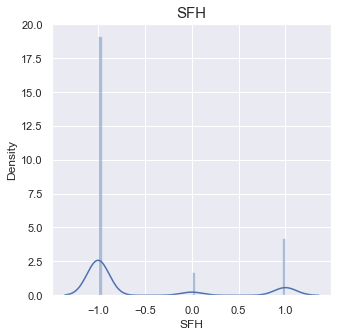

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


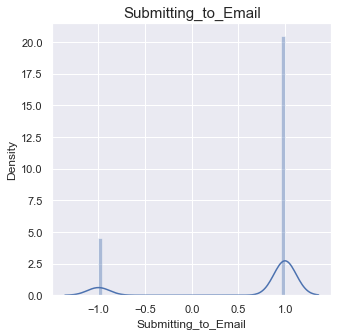

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


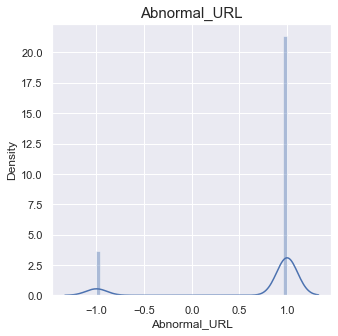

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


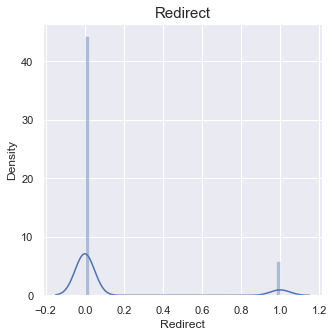

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


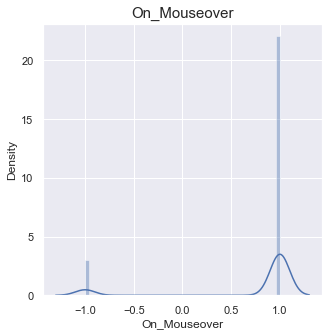

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


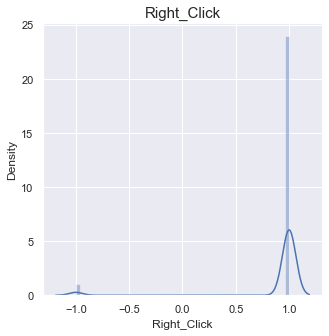

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


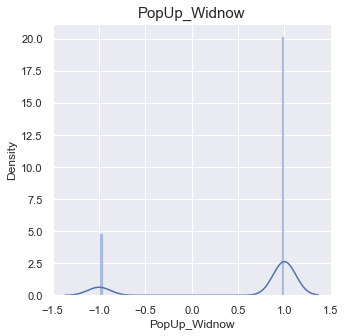

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


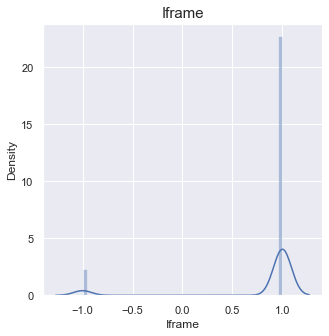

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


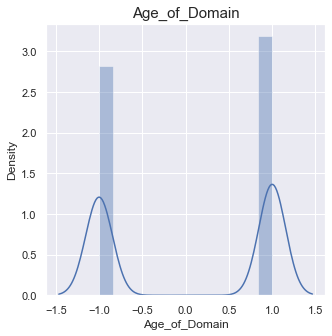

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


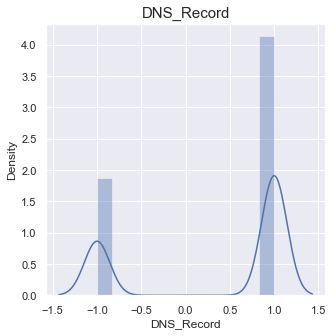

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


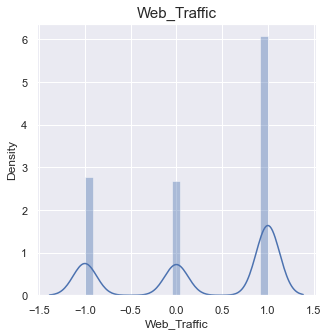

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


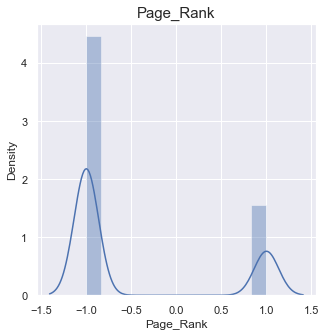

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


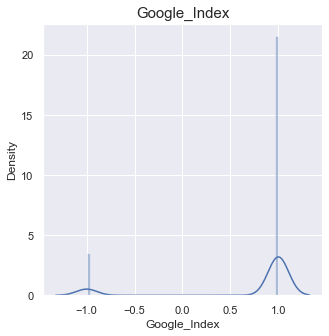

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


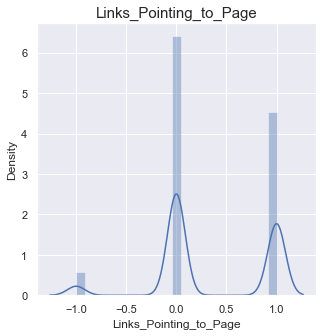

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


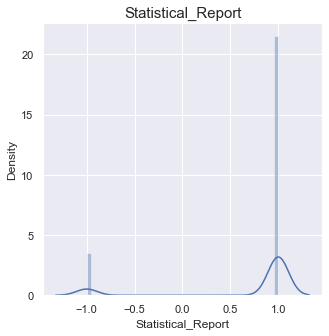

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


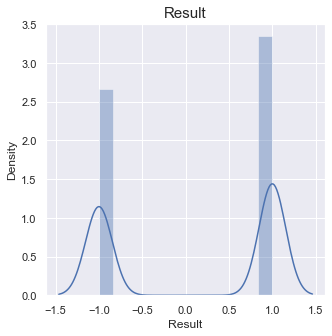

In [17]:
sns.set_theme(style="darkgrid")
for i in phishingDataset.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(phishingDataset[i])
    plt.title(i, size=15)
    plt.show()

As can be seen in the graphs above, outliers are not important since they are few in number.

<font color='burgundy'>**B. DATA TRANSFORMATION**</font>

The process of transforming raw data into a format or structure that is more suited for model building and data discovery in general is known as data transformation. It's a crucial stage in feature engineering that aids in the discovery of new information. This study will go through normalization, feature selection, discretization.

**1. Normalization**

For the best results, some data-mining approaches, such as those based on distance computation between points in an n-dimensional space, may require normalized data. Scaling the measured values to a certain range, such as [- 1, 1] or [0, 1], is possible. If the data aren't normalized, the distance measures will favor the features with higher average values. Data can be normalized in a variety of ways. 

**Range of Attributes**

The value ranges of the features should be checked to decide whether to apply normalization.

In [18]:
for i in phishingDataset.columns:
     print(i,phishingDataset[i].unique())

Having_IP_Address [-1  1]
URL_Length [ 1  0 -1]
Shortining_Service [ 1 -1]
Having_at_Symbol [ 1 -1]
Double_Slash_Redirecting [-1  1]
Prefix_Suffix [-1  1]
Having_Subdomain [-1  0  1]
SSL_Final_State [-1  1  0]
Domain_Registeration_Length [-1  1]
Favicon [ 1 -1]
Port [ 1 -1]
HTTPS_Token [-1  1]
Request_URL [ 1 -1]
URL_of_Anchor [-1  0  1]
Links_in_Tags [ 1 -1  0]
SFH [-1  1  0]
Submitting_to_Email [-1  1]
Abnormal_URL [-1  1]
Redirect [0 1]
On_Mouseover [ 1 -1]
Right_Click [ 1 -1]
PopUp_Widnow [ 1 -1]
Iframe [ 1 -1]
Age_of_Domain [-1  1]
DNS_Record [-1  1]
Web_Traffic [-1  0  1]
Page_Rank [-1  1]
Google_Index [ 1 -1]
Links_Pointing_to_Page [ 1  0 -1]
Statistical_Report [-1  1]
Result [-1  1]


When the value ranges of the attributes are checked, it is seen that all of them take values in the range of [-1,1] or [0,1]. For this reason, there is no need to apply any normalization process to the Phishing Website Dataset.

**2. Feature Selection**

In data mining, feature selection, also known as variable selection, feature reduction, attribute selection, or variable subset selection, is a set of techniques that select a subset of relevant features for building robust learning models by removing most irrelevant and redundant features from the data. The objective of feature selection is threefold: improving the performance of a data - mining model, providing a faster and more cost - effective learning process, and providing a better understanding of the underlying process that generates the data. There are 3 methods for feature selection:

    A.Filter Methods,
        1.Chi-squared Test (for non negative attributes) 
        2.Information Gain ()
        3.Correlation Coefficient Scores etc.
        
    B.Wrapper Methods
        1.Forward Feature Selection 
        2.Backward Feature Elimination, 
        3.Recursive Feature Elimination etc.
        
    C.Embedded Methods
        1.LASSO 
        2.Elastic Net 
        3.Ridge Regression etc.

Since all inputs and output are numerical in the dataset, the most suitable feature selection methods that can be applied to this dataset are Correlation Matrix and the Recursive Feature Elimination (or RFE).

**A. Correlation Matrix**

<AxesSubplot:>

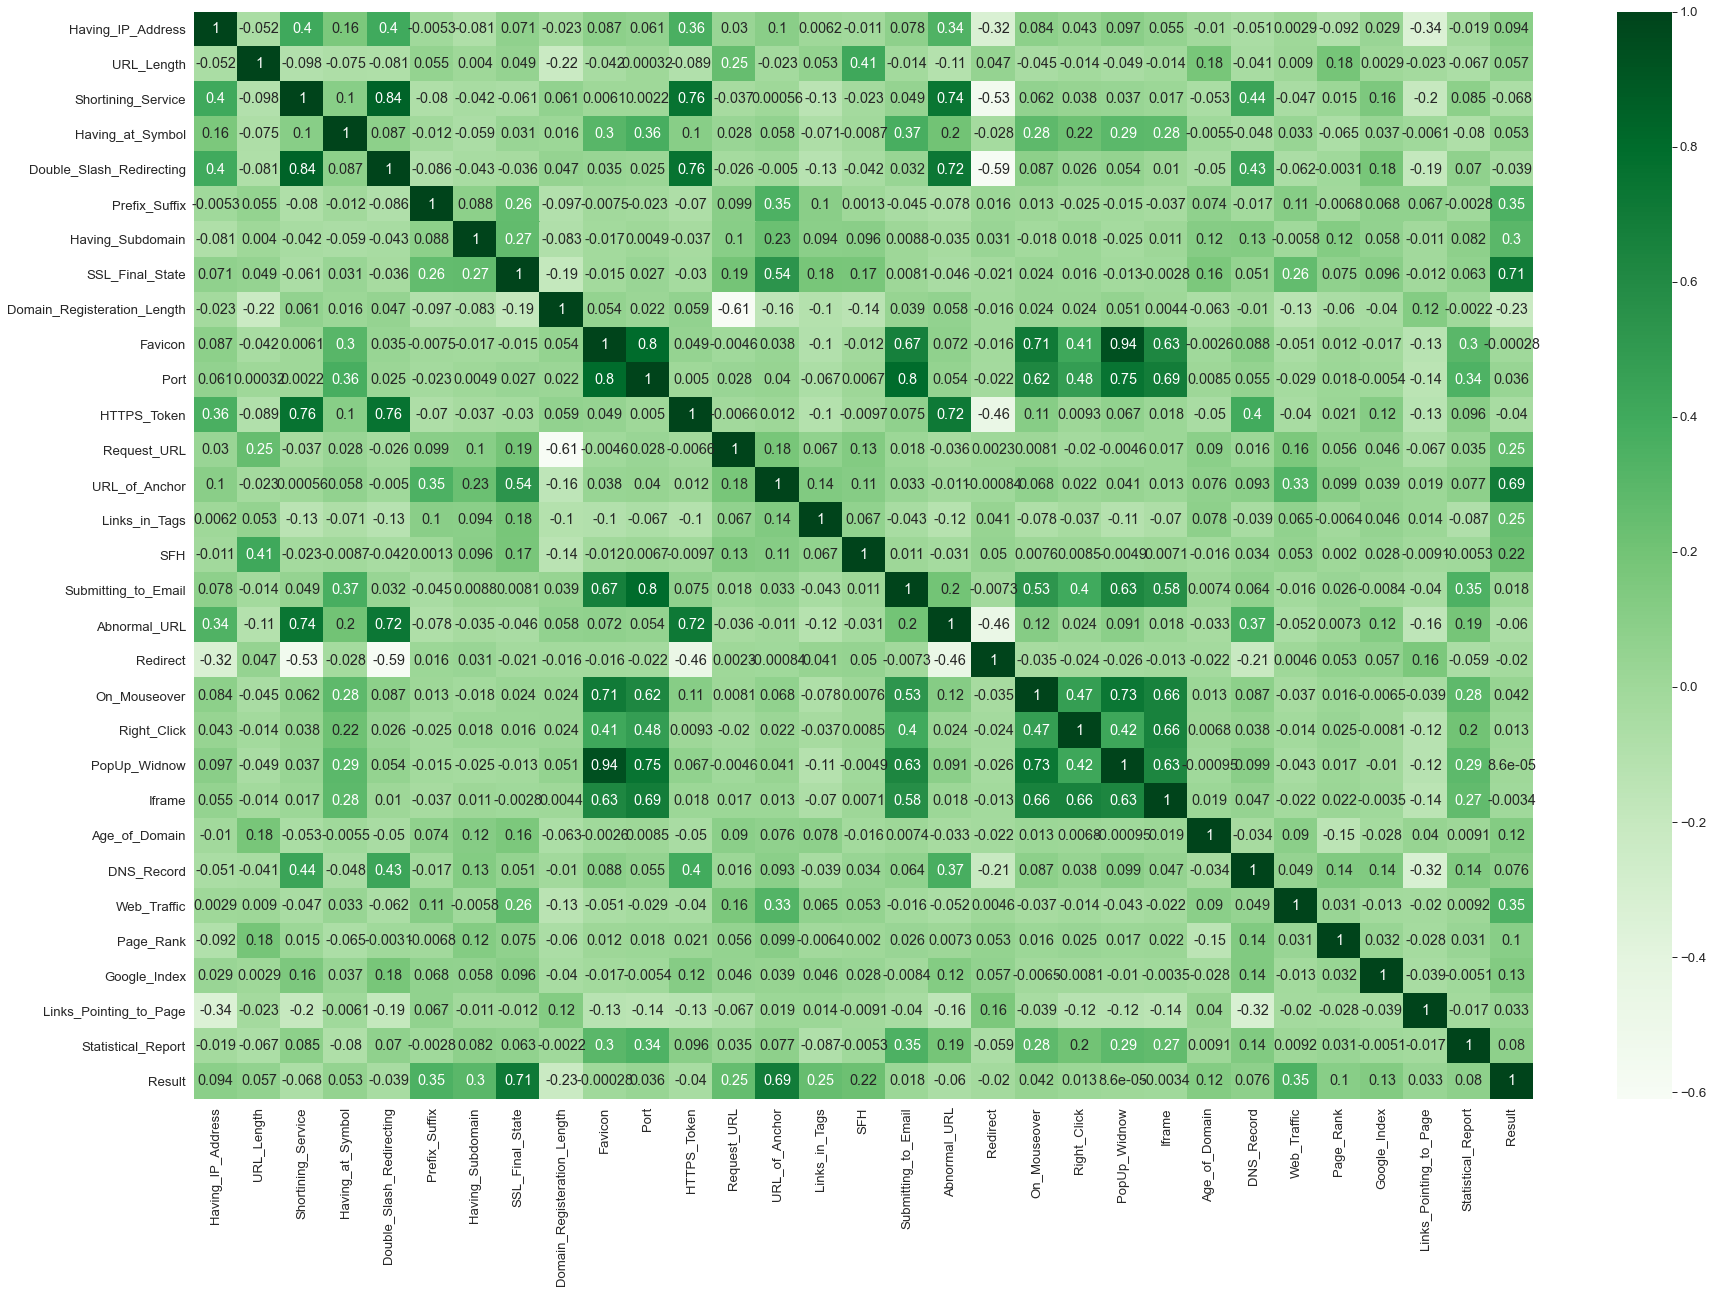

In [19]:
plt.figure(figsize=(30,20))
sns.set_context('paper',font_scale=1.5)
sns.heatmap(phishingDataset.corr(),  annot=True,cmap='Greens')

In order to better interpret the correlation matrix, the correlation must be plotted on the heatmap.

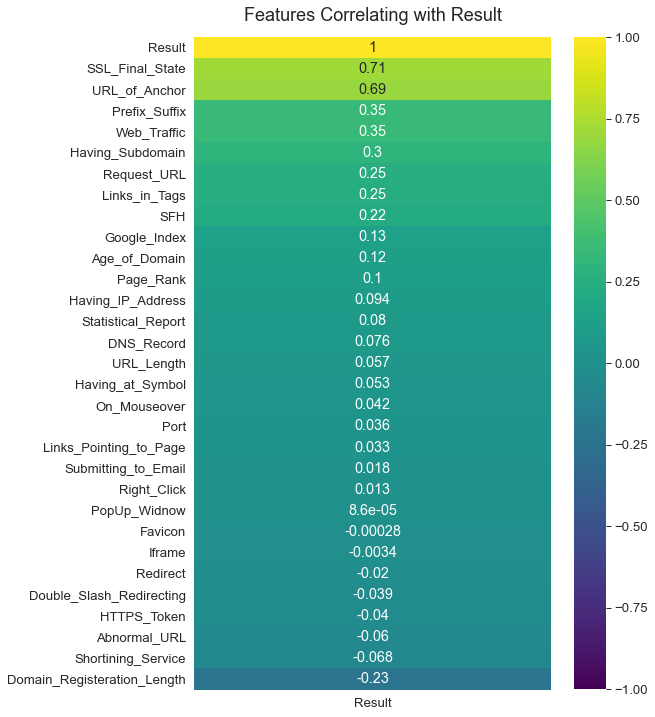

In [20]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(phishingDataset.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap = 'viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16);
plt.savefig('heatmapfeaturecorr.png', dpi=300, bbox_inches='tight')

As a result of the correlation matrix, the following 10 features were found to be more effective:

     1. SSL_Final_State
     2. URL_of_Anchor
     3. Prefix_Suffix 
     4. Web_Traffic
     5. Having_Subdomain
     6. Requested_URL
     7. Links_in_Tags
     8. SFH
     9. Google_Index 
    10. Age_of_Domain 

Since the feature selection directly affects the model to be installed, it is necessary to make sure that the right features are selected. For this, RFE which is a different feature selection method, should also be considered.

**B. The Recursive Feature Elimination (RFE)**

**Converting Pandas DataFrame to Numpy Array**

Before RFE, we have to convert the Pandas data frame to a Numpy array to use scikit-learn library, 

**For Target Variable (Class)**

In [21]:
Class = phishingDataset[['Result']] .values 
Class[0:5]

array([[-1],
       [-1],
       [-1],
       [-1],
       [ 1]], dtype=int64)

**For Attributes**

In [22]:
phishingDataset = phishingDataset[[ 'Having_IP_Address', 'URL_Length', 'Shortining_Service',
       'Having_at_Symbol', 'Double_Slash_Redirecting', 'Prefix_Suffix',
       'Having_Subdomain', 'SSL_Final_State', 'Domain_Registeration_Length',
       'Favicon', 'Port', 'HTTPS_Token', 'Request_URL', 'URL_of_Anchor',
       'Links_in_Tags', 'SFH', 'Submitting_to_Email', 'Abnormal_URL',
       'Redirect', 'On_Mouseover', 'Right_Click', 'PopUp_Widnow', 'Iframe',
       'Age_of_Domain', 'DNS_Record', 'Web_Traffic', 'Page_Rank',
       'Google_Index', 'Links_Pointing_to_Page', 'Statistical_Report']] .values 
phishingDataset[0:5]

array([[-1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1, -1,
        -1, -1,  0,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1],
       [ 1,  1,  1,  1,  1, -1,  0,  1, -1,  1,  1, -1,  1,  0, -1, -1,
         1,  1,  0,  1,  1,  1,  1, -1, -1,  0, -1,  1,  1,  1],
       [ 1,  0,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  0, -1, -1,
        -1, -1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  0, -1],
       [ 1,  0,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1, -1,  0,  0, -1,
         1,  1,  0,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1],
       [ 1,  0, -1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  0,  0, -1,
         1,  1,  0, -1,  1, -1,  1, -1, -1,  0, -1,  1,  1,  1]],
      dtype=int64)

It can now be applied RFE to the dataset.

In [23]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
rfe = RFE(model, n_features_to_select=10, step=1)
fit = rfe.fit(phishingDataset, Class)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False  True False False False  True  True  True  True False False False
 False  True  True False  True False False False False False False False
 False  True False False  True False]
Feature Ranking: [ 6  1 14 16 21  1  1  1  1 18 19 13  2  1  1  4  1 15 10 12 17  9 20  3
  8  1  7  5  1 11]


As a result of applying the RFE method to the data set, the following 10feature should be selected.

     1. URL_Length
     2. Prefix_Suffix
     3. Having_Subdomain 
     4. SSL_Final_State 
     5. Domain_Registeration_Length
     6. URL_of_Anchor 
     7. Links_in_Tags 
     8. Submitting_to_Email
     9. Web_Traffic
    10. Links_Pointing_to_Page

The following features were selected as a result of 2 methods applied to the data set and detailed examinations:

     1. URL_Length
     2. Prefix_Suffix
     3. Having_Subdomain 
     4. SSL_Final_State 
     5. Domain_Registeration_Length
     6. URL_of_Anchor 
     7. Links_in_Tags 
     8. Submitting_to_Email
     9. Web_Traffic
    10. Links_Pointing_to_Page 

**Deleting Unselected Columns from the Dataset**

In [24]:
phishingDataset = np.delete(phishingDataset, [0,2,3,4,9,10,11,12,15,17,18,19,20,21,22,23,24,26,27,29],1)
phishingDataset

array([[ 1, -1, -1, ..., -1, -1,  1],
       [ 1, -1,  0, ...,  1,  0,  1],
       [ 0, -1, -1, ..., -1,  1,  0],
       ...,
       [-1, -1,  1, ...,  1,  1,  0],
       [-1, -1, -1, ...,  1,  1,  1],
       [-1, -1, -1, ...,  1, -1,  1]], dtype=int64)

**3. Discretization**

Data discretization is a technique for converting continuous data attribute values into a finite collection of intervals with little information loss. By substituting interval markers for numeric data values, data discretization makes data transport easier. Interval labels such as (0-10, 11-20...) or (0-10, 11-20...) may be substituted for the values for the 'generation' variable, similarly to the values for the 'generation' variable (kid, youth, adult, senior). 

Since there are no categorical attributes in the data set, no action is required during the discretization phase.

**DATA REDUCTION**

Data reduction techniques can be applied to obtain a reduced representation of the data set that is much smaller in volume, yet closely maintains the integrity of the original data. That is, mining on the reduced data set should be more efficient yet produce the same (or almost the same) analytical results.Data reduction strategies include dimensionality reduction, numerosity reduction, parametric reduction, and non-parametric reduction.


**Splitting Dataset Into Two Parts as TRAIN and TEST**

Before Data Reduction Step, we have to split datset into two parts which are Train and Test.

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( phishingDataset, Class, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8844, 10) (8844, 1)
Test set: (2211, 10) (2211, 1)


PCA can now be applied to the dataset

**Principal Component Analysis (PCA)**

In [26]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

With this process, the data preparation phase has been completed and classification algorithms can now be applied to the data set.

<div id="preprocessing">
    <h2>
        <font color='purple'>4. Classification </font>
    </h2>
</div>

Classification, which is a type of supervised machine learning, is a machine learning technique that learns using classes in a labeled dataset and tries to find the classes of samples in the tested dataset. The following classification algorithms were used in this study:

    1. Decision Tree Algorithm
    2. Naïve Bayes Algorithm, 
    3. K-Nearest Neighbours Algorithm, 
    4. Logistic Regression Algorithm, and 
    5. Random Forest Algorithm 

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

Accuracy=[]       #for comparing accuracy result of all alforithms

# Classification Report Function
def classificationReport(actual, pred):
    print(f'Accuracy score: {accuracy_score(actual, pred)}')
    print(f'\nConfusion matrix: \n{confusion_matrix(actual, pred)}')
    print(f'\nClassification report: \n{classification_report(actual, pred)}')

**1. Desicion Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,roc_curve,auc, confusion_matrix

decisionTree = DecisionTreeClassifier(criterion='entropy') # function to measure the quality of split 
decisionTree.fit(X_train,y_train)
decisionTreePredict = decisionTree.predict(X_test)
Accuracy.append(accuracy_score(y_test, decisionTreePredict))

print("CLASSIFICATION REPORT OF NAIVE BAYES CLASSIFIER: \n")
classificationReport(y_test, decisionTreePredict)

CLASSIFICATION REPORT OF NAIVE BAYES CLASSIFIER: 

Accuracy score: 0.9484396200814111

Confusion matrix: 
[[ 894   50]
 [  64 1203]]

Classification report: 
              precision    recall  f1-score   support

          -1       0.93      0.95      0.94       944
           1       0.96      0.95      0.95      1267

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



**2. Naive Bayes Classification**

In [29]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

nbc = GaussianNB()
nbc = nbc.fit(X_train, y_train)
nbcPredict = nbc.predict(X_test)
Accuracy.append(accuracy_score(y_test, nbcPredict))

print("CLASSIFICATION REPORT OF NAIVE BAYES CLASSIFIER: \n")
classificationReport(y_test, nbcPredict)

CLASSIFICATION REPORT OF NAIVE BAYES CLASSIFIER: 

Accuracy score: 0.9027589326096789

Confusion matrix: 
[[ 830  114]
 [ 101 1166]]

Classification report: 
              precision    recall  f1-score   support

          -1       0.89      0.88      0.89       944
           1       0.91      0.92      0.92      1267

    accuracy                           0.90      2211
   macro avg       0.90      0.90      0.90      2211
weighted avg       0.90      0.90      0.90      2211



C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**3. K-Nearest Neighbors(KNN) Classfier**

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
knnPredict = knn.predict(X_test)
Accuracy.append(accuracy_score(knnPredict,y_test))

print("CLASSIFICATION REPORT OF KNN CLASSIFIER: \n")
classificationReport(y_test,knnPredict)

CLASSIFICATION REPORT OF KNN CLASSIFIER: 

Accuracy score: 0.9393939393939394

Confusion matrix: 
[[ 856   88]
 [  46 1221]]

Classification report: 
              precision    recall  f1-score   support

          -1       0.95      0.91      0.93       944
           1       0.93      0.96      0.95      1267

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



C:\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


**4. Logistic Regression**

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve

logReg = LogisticRegression()
logReg = logReg.fit(X_train,y_train)
logPredict = logReg.predict(X_test)
Accuracy.append(accuracy_score(logPredict,y_test))

print("CLASSIFICATION REPORT OF LOGISTIC REGRESSION CLASSIFIER: \n")
classificationReport(y_test, logPredict)

CLASSIFICATION REPORT OF LOGISTIC REGRESSION CLASSIFIER: 

Accuracy score: 0.9118046132971506

Confusion matrix: 
[[ 837  107]
 [  88 1179]]

Classification report: 
              precision    recall  f1-score   support

          -1       0.90      0.89      0.90       944
           1       0.92      0.93      0.92      1267

    accuracy                           0.91      2211
   macro avg       0.91      0.91      0.91      2211
weighted avg       0.91      0.91      0.91      2211



C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


**5. Random Forest**

In [32]:
from sklearn.ensemble import RandomForestClassifier

ranFrst = RandomForestClassifier()
ranFrst = ranFrst.fit(X_train,y_train)
ranFrstPredict = ranFrst.predict(X_test)
Accuracy.append(accuracy_score(ranFrstPredict,y_test))

print("CLASSIFICATION REPORT OF NAIRANDOM FOREST CLASSIFIER: \n")
classificationReport(y_test, ranFrstPredict)

<ipython-input-32-b7974c30ee48>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ranFrst = ranFrst.fit(X_train,y_train)


CLASSIFICATION REPORT OF NAIRANDOM FOREST CLASSIFIER: 

Accuracy score: 0.952962460425147

Confusion matrix: 
[[ 897   47]
 [  57 1210]]

Classification report: 
              precision    recall  f1-score   support

          -1       0.94      0.95      0.95       944
           1       0.96      0.96      0.96      1267

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



<div id="preprocessing">
    <h2>
        <font color='purple'>5. Conclusion </font>
    </h2>
</div>

Text(0.5, 1.0, 'ROC Curve for All Algorithms')

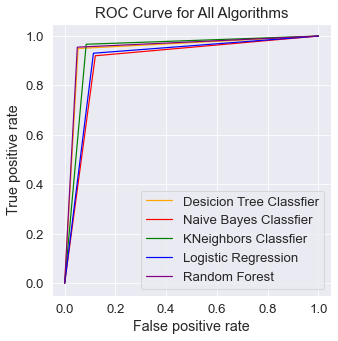

In [30]:
#ROC Curve for Desicion Tree  Classfier
fpr,tpr,thresh = roc_curve(y_test,decisionTreePredict)
rocAucurracy = accuracy_score(y_test,decisionTreePredict)
plt.plot(fpr,tpr,'orange',label = 'Desicion Tree Classfier')

#ROC Curve for Naive Bayes Classfier
fpr,tpr,thresh = roc_curve(y_test,nbcPredict)
rocAucurracy = accuracy_score(y_test,nbcPredict)
plt.plot(fpr,tpr,'red',label = 'Naive Bayes Classfier')

#ROC Curve for KNeighbors Classfier
fpr,tpr,thresh = roc_curve(y_test,knnPredict)
rocAucurracy = accuracy_score(y_test,knnPredict)
plt.plot(fpr,tpr,'green',label = 'KNeighbors Classfier')

#ROC Curve for Logistic Regression
fpr,tpr,thresh = roc_curve(y_test,logPredict)
rocAucurracy = accuracy_score(y_test,logPredict)
plt.plot(fpr,tpr,'blue',label = 'Logistic Regression')

#ROC Curve for Random Forest
fpr,tpr,thresh = roc_curve(y_test,ranFrstPredict)
rocAucurracy = accuracy_score(y_test,ranFrstPredict)
plt.plot(fpr,tpr,'purple',label = 'Random Forest')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(loc='lower right')
plt.title("ROC Curve for All Algorithms", size=15)

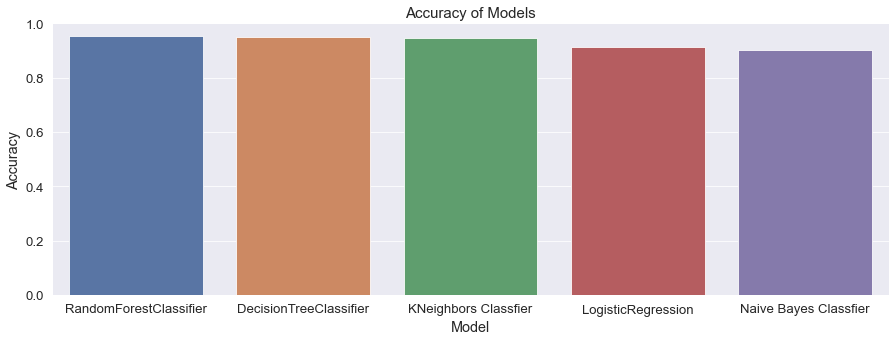

In [31]:
model=["DecisionTreeClassifier", "Naive Bayes Classfier", "KNeighbors Classfier", "LogisticRegression","RandomForestClassifier", ]
models_acc = []
for i in range(0,5):
    models_acc.append([model[i],Accuracy[i]])
datasetAcc = pd.DataFrame(models_acc)
datasetAcc.columns = ['Model', 'Accuracy']
datasetAcc.sort_values(by = 'Accuracy', ascending = False, inplace=True)
datasetAcc.reset_index(drop = True, inplace=True)

plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y = 'Accuracy', data = datasetAcc)
plt.title('Accuracy of Models', fontsize = 15)
plt.ylim(0,1)
plt.show()